In [111]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
 'Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [112]:
import numpy as np
data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
 print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [156]:
data1=data
data1 = data1.fillna(data1.median())
print('\nAfter replacing missing values:')
print(data1[20:25])


After replacing missing values:
    Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
20                7                        3                         2   
21               10                        5                         5   
22                3                        1                         1   
23                8                        4                         5   
24                1                        1                         1   

    Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
20                 10                            5          10   
21                  3                            6           7   
22                  1                            2           1   
23                  1                            2           1   
24                  1                            2           1   

    Bland Chromatin  Normal Nucleoli  Mitoses  Class  
20                5                4        4      4  
21             

In [157]:
print('Number of rows in original data = %d' % (data.shape[0]))
print('Number of rows after discarding missing values = %d' % (data1.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 699


In [114]:
print('Number of rows in original data = %d' % (data.shape[0]))
data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


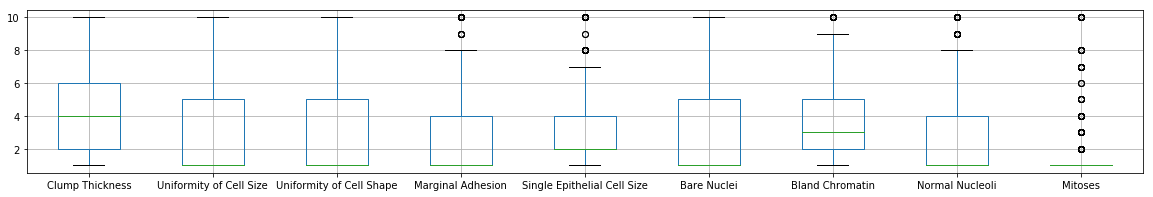

In [115]:
%matplotlib inline
data_box_data1 = data1.drop(['Class'],axis=1)
data_box_data1['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])
data_box_data1.boxplot(figsize=(20,3))

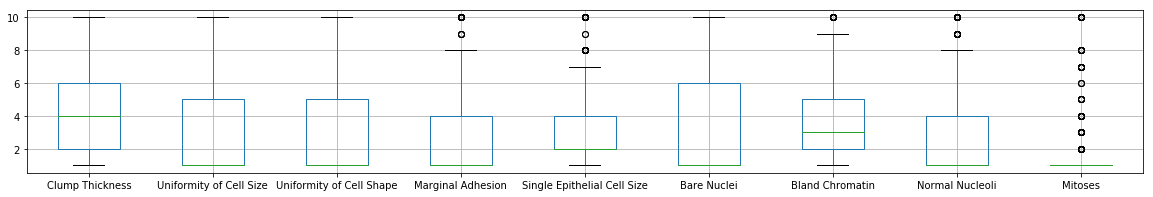

In [116]:
%matplotlib inline
data_box_data2 = data2.drop(['Class'],axis=1)
data_box_data2['Bare Nuclei'] = pd.to_numeric(data_box_data2['Bare Nuclei'])
data_box_data2.boxplot(figsize=(20,3))

In [117]:
Z_data1 = (data_box_data1-data_box_data1.mean())/data_box_data1.std()
Z_data1[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.798376,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.970088,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,-0.686488,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666


In [118]:
Z1 = Z_data1.loc[((Z_data1 > -3).sum(axis=1)==9) & ((Z_data1 <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z1.shape[0]))

Number of rows after discarding missing values = 648


In [119]:
Z_data2 = (data_box_data2-data_box_data2.mean())/data_box_data2.std()
Z_data2[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.906788,-0.049200,-0.406623,2.502944,0.794274,1.771569,0.634734,0.370269,1.383283
21,1.970331,0.603298,0.597198,0.059290,1.244099,0.948266,1.451161,2.335764,-0.348145
22,-0.511269,-0.701698,-0.741230,-0.638897,-0.555202,-0.698341,-0.589908,-0.612478,-0.348145
24,-1.220297,-0.701698,-0.741230,-0.638897,-0.555202,-0.698341,-0.181694,-0.612478,-0.348145
25,0.197760,-0.375449,-0.072016,0.408383,-0.555202,0.948266,-0.181694,1.025434,-0.348145


In [120]:
Z2 = Z_data2.loc[((Z_data2 > -3).sum(axis=1)==9) & ((Z_data2 <= 3).sum(axis=1)==9),:]
print('Number of rows = %d' % (Z2.shape[0]))

Number of rows = 632


In [121]:
data1_x = data1.drop(['Class'],axis=1)
print('Number of instances = %d' % (data1_x.shape[0]))
print('Number of attributes = %d' % (data1_x.shape[1]))
data1_x.head()
data1_y = data1['Class']
print('Number of instances = %d' % (data1_y.shape[0]))
#print('Number of attributes = %d' % (data1_y.shape[1]))
data1_y.head()

Number of instances = 699
Number of attributes = 9
Number of instances = 699


0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data1_x, data1_y, test_size = 0.2, random_state = 0)

In [123]:
print(X_train.shape)
print(Y_train.shape)

(559, 9)
(559,)


[0.9642857142857143, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9714285714285714, 0.9714285714285714, 0.9642857142857143]
0.9724489795918367


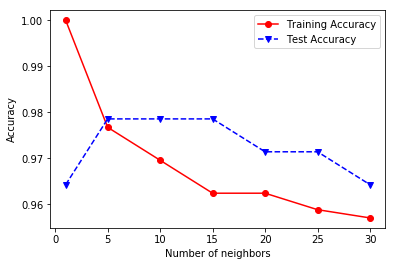

In [124]:
#a.Fill-in Missing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30] 
trainAcc_knnd1 = []
testAcc_knndA = []
for k in numNeighbors:
 clf_knnd1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
 clf_knnd1.fit(X_train, Y_train)
 Y_predTrain_knnd1 = clf_knnd1.predict(X_train)
 Y_predTest_knnd1 = clf_knnd1.predict(X_test)
 trainAcc_knnd1.append(accuracy_score(Y_train, Y_predTrain_knnd1))
 testAcc_knndA.append(accuracy_score(Y_test, Y_predTest_knnd1))
plt.plot(numNeighbors, trainAcc_knnd1, 'ro-', numNeighbors, testAcc_knndA,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
print(testAcc_knndA)
print(np.mean(testAcc_knndA))

In [125]:
data2_x = data2.drop(['Class'],axis=1)
print('Number of instances = %d' % (data2_x.shape[0]))
print('Number of attributes = %d' % (data2_x.shape[1]))
data2_x.head()
data2_y = data2['Class']
print('Number of instances = %d' % (data2_y.shape[0]))
#print('Number of attributes = %d' % (data2_y.shape[1]))
data2_y.head()

Number of instances = 683
Number of attributes = 9
Number of instances = 683


0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data2_x, data2_y, test_size = 0.2,random_state = 0)

In [127]:
print(X_train.shape)
print(Y_train.shape)

(546, 9)
(546,)


[0.9781021897810219, 0.9708029197080292, 0.948905109489051, 0.948905109489051, 0.9416058394160584, 0.9416058394160584, 0.9416058394160584]
0.9530761209593326


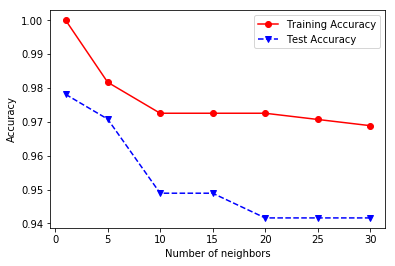

In [128]:
#b.Fill-in Missing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30] 
trainAcc_knnd1 = []
testAcc_knndB = []
for k in numNeighbors:
 clf_knnd1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
 clf_knnd1.fit(X_train, Y_train)
 Y_predTrain_knnd1 = clf_knnd1.predict(X_train)
 Y_predTest_knnd1 = clf_knnd1.predict(X_test)
 trainAcc_knnd1.append(accuracy_score(Y_train, Y_predTrain_knnd1))
 testAcc_knndB.append(accuracy_score(Y_test, Y_predTest_knnd1))
plt.plot(numNeighbors, trainAcc_knnd1, 'ro-', numNeighbors, testAcc_knndB,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
print(testAcc_knndB)
print(np.mean(testAcc_knndB))

In [129]:
C1 = data1.drop(['Class'],axis=1)
C1['Bare Nuclei'] = pd.to_numeric(C1['Bare Nuclei'])

In [130]:
Z_C1 = (C1-C1.mean())/C1.std()
Z_C1[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.798376,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.970088,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,-0.686488,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666


In [131]:
Z3 = data1.loc[((Z_C1 > -3).sum(axis=1)==9) & ((Z_C1 <= 3).sum(axis=1)==9),:]
data3_x = Z3.drop(['Class'],axis=1)
data3_y = Z3['Class']

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data3_x, data3_y, test_size = 0.2,random_state = 0)

In [133]:
print(X_train.shape)
print(Y_train.shape)

(518, 9)
(518,)


[0.9461538461538461, 0.9769230769230769, 0.9615384615384616, 0.9692307692307692, 0.9692307692307692, 0.9692307692307692, 0.9615384615384616]
0.9648351648351648


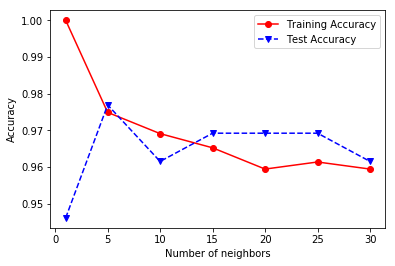

In [134]:
# C.K-NN with Fill-in Missing + Managing Outlier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndC = []
for k in numNeighbors:
    clf_knnd1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd1.fit(X_train, Y_train)
    Y_predTrain_knnd1 = clf_knnd1.predict(X_train)
    Y_predTest_knnd1 = clf_knnd1.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(Y_train,Y_predTrain_knnd1))
    testAcc_knndC.append(accuracy_score(Y_test,Y_predTest_knnd1))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndC,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
print(testAcc_knndC)
print(np.mean(testAcc_knndC))

In [135]:
D2 = data2.drop(['Class'],axis=1)
D2['Bare Nuclei'] = pd.to_numeric(D2['Bare Nuclei'])

In [136]:
Z_D2 = (D2-D2.mean())/D2.std()
Z_D2[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.906788,-0.049200,-0.406623,2.502944,0.794274,1.771569,0.634734,0.370269,1.383283
21,1.970331,0.603298,0.597198,0.059290,1.244099,0.948266,1.451161,2.335764,-0.348145
22,-0.511269,-0.701698,-0.741230,-0.638897,-0.555202,-0.698341,-0.589908,-0.612478,-0.348145
24,-1.220297,-0.701698,-0.741230,-0.638897,-0.555202,-0.698341,-0.181694,-0.612478,-0.348145
25,0.197760,-0.375449,-0.072016,0.408383,-0.555202,0.948266,-0.181694,1.025434,-0.348145


In [137]:
Z4 = data2.loc[((Z_D2 > -3).sum(axis=1)==9) & ((Z_D2 <= 3).sum(axis=1)==9),:]
data4_x = Z4.drop(['Class'],axis=1)
data4_y = Z4['Class']

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data4_x, data4_y, test_size = 0.2,random_state = 0)

In [139]:
print(X_train.shape)
print(Y_train.shape)

(505, 9)
(505,)


[0.9212598425196851, 0.9606299212598425, 0.9606299212598425, 0.9606299212598425, 0.952755905511811, 0.9606299212598425, 0.9606299212598425]
0.9538807649043869


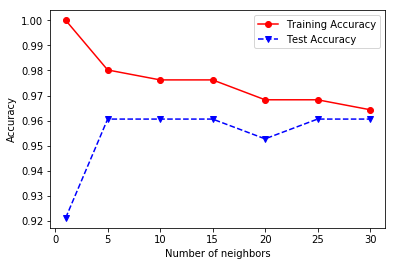

In [140]:
#d.Ignored Missing + Managing Outliers
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knndD = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, Y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd2.append(accuracy_score(Y_train,Y_predTrain_knnd2))
    testAcc_knndD.append(accuracy_score(Y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd2,'ro-',numNeighbors,testAcc_knndD,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
print(testAcc_knndD)
print(np.mean(testAcc_knndD))

In [141]:
import pandas as pd
data_E = data1.drop_duplicates()

In [142]:
E1 = data_E.drop(['Class'],axis=1)
E1['Bare Nuclei'] = pd.to_numeric(E1['Bare Nuclei'])

In [143]:
Z_E1 = (E1-E1.mean())/E1.std()
Z_E1[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.583219,-0.362677,-0.717459,2.001363,0.473996,1.369473,0.314276,0.058056,1.034818
21,1.627150,0.254674,0.243535,-0.219252,0.882674,0.595593,1.072138,1.830345,-0.433376
22,-0.808690,-0.980029,-1.037791,-0.853714,-0.752038,-0.952168,-0.822518,-0.828089,-0.433376
23,0.931196,-0.054002,0.243535,-0.853714,-0.752038,-0.952168,1.072138,-0.237326,-0.433376
24,-1.504644,-0.980029,-1.037791,-0.853714,-0.752038,-0.952168,-0.443587,-0.828089,-0.433376


In [144]:
Z5 = data_E.loc[((Z_E1 > -3).sum(axis=1)==9) & ((Z_E1 <= 3).sum(axis=1)==9),:]
data5_x = Z5.drop(['Class'],axis=1)
data5_y = Z5['Class']

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data5_x, data5_y, test_size = 0.2,random_state = 0)

In [146]:
print(X_train.shape)
print(Y_train.shape)

(359, 9)
(359,)


[0.8888888888888888, 0.9111111111111111, 0.9111111111111111, 0.9, 0.9, 0.8888888888888888, 0.9]
0.9000000000000001


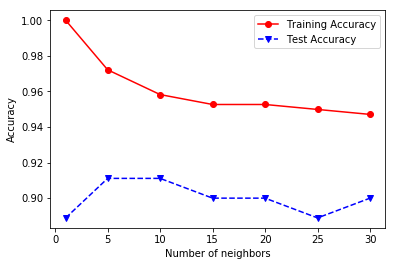

In [147]:
# E.K-NN with Fill-in Missing + Managing Outlier + Managing Duplicate data
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndE = []
for k in numNeighbors:
    clf_knnd1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd1.fit(X_train, Y_train)
    Y_predTrain_knnd1 = clf_knnd1.predict(X_train)
    Y_predTest_knnd1 = clf_knnd1.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(Y_train,Y_predTrain_knnd1))
    testAcc_knndE.append(accuracy_score(Y_test,Y_predTest_knnd1))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndE,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
print(testAcc_knndE)
print(np.mean(testAcc_knndE))

In [148]:
import pandas as pd
data_F = data2.drop_duplicates()

In [149]:
F2 = data_F.drop(['Class'],axis=1)
F2['Bare Nuclei'] = pd.to_numeric(F2['Bare Nuclei'])

In [150]:
Z_F2 = (F2-F2.mean())/F2.std()
Z_F2[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.565132,-0.376073,-0.723841,1.980076,0.456034,1.338423,0.301533,0.050630,1.008676
21,1.610782,0.239070,0.231119,-0.236227,0.863110,0.565329,1.055785,1.822033,-0.441363
22,-0.829068,-0.991215,-1.042161,-0.869457,-0.765194,-0.980860,-0.829845,-0.835071,-0.441363
24,-1.526168,-0.991215,-1.042161,-0.869457,-0.765194,-0.980860,-0.452719,-0.835071,-0.441363
25,-0.131968,-0.683644,-0.405521,0.080388,-0.765194,0.565329,-0.452719,0.641098,-0.441363


In [151]:
Z6 = data_F.loc[((Z_F2 > -3).sum(axis=1)==9) & ((Z_F2 <= 3).sum(axis=1)==9),:]
data6_x = Z6.drop(['Class'],axis=1)
data6_y = Z6['Class']

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data6_x, data6_y, test_size = 0.2,random_state = 0)

In [153]:
print(X_train.shape)
print(Y_train.shape)

(348, 9)
(348,)


[0.9080459770114943, 0.9195402298850575, 0.9080459770114943, 0.9080459770114943, 0.896551724137931, 0.896551724137931, 0.896551724137931]
0.9047619047619045


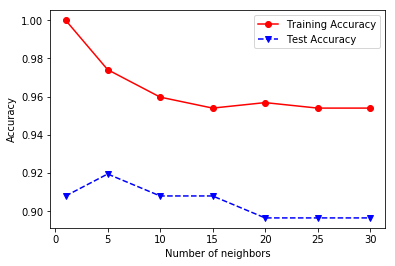

In [154]:
# F.K-NN with  Ignored Missing + Managing Outlier + Managing Duplicate data
#manging
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knndF = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, Y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd2.append(accuracy_score(Y_train,Y_predTrain_knnd2))
    testAcc_knndF.append(accuracy_score(Y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd2,'ro-',numNeighbors,testAcc_knndF,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
print(testAcc_knndF)
print(np.mean(testAcc_knndF))

Text(0, 0.5, 'Accuracy')

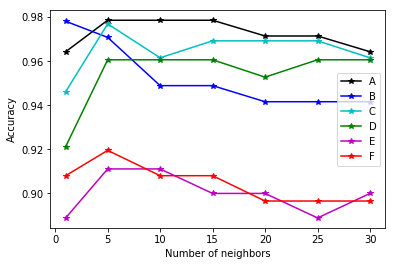

In [155]:
plt.plot(numNeighbors, testAcc_knndA,'k*-')
plt.plot(numNeighbors,testAcc_knndB,'b*-')
plt.plot(numNeighbors,testAcc_knndC,'c*-')
plt.plot(numNeighbors,testAcc_knndD,'g*-')
plt.plot(numNeighbors,testAcc_knndE,'m*-')
plt.plot(numNeighbors,testAcc_knndF,'r*-')

plt.legend(['A','B','C','D','E','F'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')